# Data

In [1]:
from pathlib import Path
import xarray as xr
import matplotlib.pyplot as plt

root = Path('F:\SR')
assert root.exists()

train_imgs = list((root/'MODIS').glob('*.tif'))
train_tars = list((root/'Landsat').glob('*.tif'))

In [2]:
import rioxarray as rxr
for i in range(len(train_imgs)):
    img = rxr.open_rasterio(train_imgs[i])
    print(img.shape)

(6, 2100, 1970)
(6, 2100, 1970)
(6, 2100, 1970)
(6, 2100, 1970)
(6, 2100, 1970)
(6, 2100, 1970)
(6, 2100, 1970)
(6, 2100, 1970)
(6, 2100, 1970)
(6, 2100, 1970)
(6, 2100, 1970)
(6, 2100, 1970)
(6, 2100, 1970)
(6, 2100, 1970)
(6, 2100, 1970)
(6, 1640, 1640)
(6, 2100, 1970)
(6, 2100, 1970)
(6, 2100, 1970)
(6, 2100, 1970)
(6, 2100, 1970)
(6, 2100, 1970)
(6, 2100, 1970)
(6, 2100, 1970)
(6, 2100, 1970)
(6, 1640, 1640)
(6, 2100, 1970)
(6, 1640, 1640)
(6, 2100, 1970)
(6, 2100, 1970)
(6, 2480, 2800)
(6, 2480, 2800)
(6, 2480, 2800)
(6, 2480, 2800)
(6, 2480, 2800)
(6, 2480, 2800)
(6, 2480, 2800)
(6, 2480, 2800)
(6, 2480, 2800)
(6, 2480, 2800)
(6, 2480, 2800)
(6, 2480, 2800)
(6, 2480, 2800)
(6, 2480, 2800)
(6, 2480, 2800)
(6, 2480, 2800)
(6, 2480, 2800)
(6, 2480, 2800)
(6, 2480, 2800)
(6, 2480, 2800)
(6, 2480, 2800)
(6, 2480, 2800)
(6, 2480, 2800)
(6, 2480, 2800)
(6, 2480, 2800)
(6, 2480, 2800)
(6, 2480, 2800)


d:\miniconda\envs\torch\lib\site-packages\rioxarray\_io.py:1111: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
d:\miniconda\envs\torch\lib\site-packages\rioxarray\_io.py:1111: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
d:\miniconda\envs\torch\lib\site-packages\rioxarray\_io.py:1111: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
d:\miniconda\envs\torch\lib\site-packages\rioxarray\_io.py:1111: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warnin

In [3]:
def scale(item: dict):
    item['image'] = item['image'] / 255
    return item

In [14]:
import os
import numpy as np
import rioxarray as rxr

# Define input directory and output file path

output_file = 'F:/SR/train_tars.npy'

# List all .tif files in the input directory
tif_files = train_tars

# Define the target shape
target_height, target_width = 1640, 1640

# Initialize an empty list to store the cropped arrays
cropped_arrays = []

for i, tif_file in enumerate(tif_files):
    input_path = train_tars[i]
    
    # Open the image using rioxarray
    img = rxr.open_rasterio(input_path)
    
    # Get the dimensions of the image
    bands, height, width = img.shape
    
    # Check if the image is larger than the target shape
    if height > target_height and width > target_width:
        # Crop the four corners
        corners = [
            img.isel(y=slice(0, target_height), x=slice(0, target_width)),  # Top-left
            img.isel(y=slice(0, target_height), x=slice(width - target_width, width)),  # Top-right
            img.isel(y=slice(height - target_height, height), x=slice(0, target_width)),  # Bottom-left
            img.isel(y=slice(height - target_height, height), x=slice(width - target_width, width))  # Bottom-right
        ]
        
        # Convert each cropped corner to a NumPy array and append to the list
        for corner_img in corners:
            cropped_arrays.append(corner_img.values)
    elif height >= target_height and width >= target_width:
        # If the image is exactly or slightly larger than the target size, take the top-left corner
        corner_img = img.isel(y=slice(0, target_height), x=slice(0, target_width))
        cropped_arrays.append(corner_img.values)

# Convert the list of cropped arrays to a single NumPy array
cropped_arrays = np.stack(cropped_arrays, axis=0)  # Shape: (length, 6, 1640, 1640)

# Save the array to a .npy file
np.save(output_file, cropped_arrays)

print(f"Saved cropped images array to {output_file} with shape {cropped_arrays.shape}")


d:\miniconda\envs\torch\lib\site-packages\rioxarray\_io.py:1111: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
d:\miniconda\envs\torch\lib\site-packages\rioxarray\_io.py:1111: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
d:\miniconda\envs\torch\lib\site-packages\rioxarray\_io.py:1111: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
d:\miniconda\envs\torch\lib\site-packages\rioxarray\_io.py:1111: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warnin

Saved cropped images array to F:/SR/train_tars.npy with shape (219, 6, 1640, 1640)


In [15]:
img_input = np.load('F:/SR/train_imgs.npy')
img_target = np.load('F:/SR/train_tars.npy')
print(img_input.shape, img_target.shape)

(219, 6, 1640, 1640) (219, 6, 1640, 1640)


## Model

In [ ]:
import torch
from torch import nn
import numpy as np
from timm.models.layers import trunc_normal_, DropPath
import torch.nn.functional as F
from Former.earth_position import calculate_position_bias_indices
from Former.shift_window import create_shifted_window_mask, partition_windows, reverse_partition
from Former.embed import ImageToPatch2D, ImageToPatch3D, ImageToPatch4D
from Former.recovery import RecoveryImage2D, RecoveryImage3D, RecoveryImage4D
from Former.pad import calculate_padding_3d, calculate_padding_2d
from Former.crop import center_crop_2d, center_crop_3d


class UpSample(nn.Module):
    """
    Up-sampling operation.
    """

    def __init__(self, in_dim, out_dim, input_resolution, output_resolution):
        super().__init__()
        self.linear1 = nn.Linear(in_dim, out_dim * 4, bias=False)
        self.linear2 = nn.Linear(out_dim, out_dim, bias=False)
        self.norm = nn.LayerNorm(out_dim)
        self.input_resolution = input_resolution
        self.output_resolution = output_resolution

    def forward(self, x: torch.Tensor):
        B, N, C = x.shape
        in_pl, in_lat, in_lon = self.input_resolution
        out_pl, out_lat, out_lon = self.output_resolution

        x = self.linear1(x)
        x = x.reshape(B, in_pl, in_lat, in_lon, 2, 2, C // 2).permute(0, 1, 2, 4, 3, 5, 6)
        x = x.reshape(B, in_pl, in_lat * 2, in_lon * 2, -1)

        assert in_pl == out_pl, "the dimension of pressure level shouldn't change"
        pad_h = in_lat * 2 - out_lat
        pad_w = in_lon * 2 - out_lon

        pad_top = pad_h // 2
        pad_bottom = pad_h - pad_top

        pad_left = pad_w // 2
        pad_right = pad_w - pad_left

        x = x[:, :out_pl, pad_top: 2 * in_lat - pad_bottom, pad_left: 2 * in_lon - pad_right, :]
        x = x.reshape(x.shape[0], x.shape[1] * x.shape[2] * x.shape[3], x.shape[4])
        x = self.norm(x)
        x = self.linear2(x)
        return x


class DownSample(nn.Module):
    """
    Down-sampling operation
    """

    def __init__(self, in_dim, input_resolution, output_resolution):
        super().__init__()
        self.linear = nn.Linear(in_dim * 4, in_dim * 2, bias=False)
        self.norm = nn.LayerNorm(4 * in_dim)
        self.input_resolution = input_resolution
        self.output_resolution = output_resolution

        in_pl, in_lat, in_lon = self.input_resolution
        out_pl, out_lat, out_lon = self.output_resolution

        assert in_pl == out_pl, "the dimension of pressure level shouldn't change"
        h_pad = out_lat * 2 - in_lat
        w_pad = out_lon * 2 - in_lon

        pad_top = h_pad // 2
        pad_bottom = h_pad - pad_top

        pad_left = w_pad // 2
        pad_right = w_pad - pad_left

        pad_front = pad_back = 0

        self.pad = nn.ZeroPad3d(
            (pad_left, pad_right, pad_top, pad_bottom, pad_front, pad_back)
        )

    def forward(self, x):
        B, N, C = x.shape
        in_pl, in_lat, in_lon = self.input_resolution
        out_pl, out_lat, out_lon = self.output_resolution
        x = x.reshape(B, in_pl, in_lat, in_lon, C)

        x = self.pad(x.permute(0, -1, 1, 2, 3)).permute(0, 2, 3, 4, 1)
        x = x.reshape(B, in_pl, out_lat, 2, out_lon, 2, C).permute(0, 1, 2, 4, 3, 5, 6)
        x = x.reshape(B, out_pl * out_lat * out_lon, 4 * C)

        x = self.norm(x)
        x = self.linear(x)
        return x


class EarthAttention3D(nn.Module):
    """
    3D window attention with earth position bias.
    """

    def __init__(self, dim, input_resolution, window_size, num_heads, qkv_bias=True, qk_scale=None, attn_drop=0.,
                 proj_drop=0.):
        super().__init__()
        self.dim = dim
        self.window_size = window_size
        self.num_heads = num_heads
        head_dim = dim // num_heads
        self.scale = qk_scale or head_dim ** -0.5

        self.type_of_windows = (input_resolution[0] // window_size[0]) * (input_resolution[1] // window_size[1])

        self.earth_position_bias_table = nn.Parameter(
            torch.zeros((window_size[0] ** 2) * (window_size[1] ** 2) * (window_size[2] * 2 - 1),
                        self.type_of_windows, num_heads)
        )

        earth_position_index = calculate_position_bias_indices(window_size)
        self.register_buffer("earth_position_index", earth_position_index)

        self.qkv = nn.Linear(dim, dim * 3, bias=qkv_bias)
        self.attn_drop = nn.Dropout(attn_drop)
        self.proj = nn.Linear(dim, dim)
        self.proj_drop = nn.Dropout(proj_drop)

        trunc_normal_(self.earth_position_bias_table, std=.02)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x: torch.Tensor, mask=None):
        B_, nW_, N, C = x.shape
        qkv = self.qkv(x).reshape(B_, nW_, N, 3, self.num_heads, C // self.num_heads).permute(3, 0, 4, 1, 2, 5)
        q, k, v = qkv[0], qkv[1], qkv[2]

        q = q * self.scale
        attn = (q @ k.transpose(-2, -1))

        earth_position_bias = self.earth_position_bias_table[self.earth_position_index.view(-1)].view(
            self.window_size[0] * self.window_size[1] * self.window_size[2],
            self.window_size[0] * self.window_size[1] * self.window_size[2],
            self.type_of_windows, -1
        )
        earth_position_bias = earth_position_bias.permute(
            3, 2, 0, 1).contiguous()
        attn = attn + earth_position_bias.unsqueeze(0)

        if mask is not None:
            nLon = mask.shape[0]
            attn = attn.view(B_ // nLon, nLon, self.num_heads, nW_, N, N) + mask.unsqueeze(1).unsqueeze(0)
            attn = attn.view(-1, self.num_heads, nW_, N, N)
            attn = self.softmax(attn)
        else:
            attn = self.softmax(attn)

        attn = self.attn_drop(attn)

        x = (attn @ v).permute(0, 2, 3, 1, 4).reshape(B_, nW_, N, C)
        x = self.proj(x)
        x = self.proj_drop(x)
        return x


class EarthSpecificBlock(nn.Module):
    """
    3D Transformer Block
    """

    def __init__(self, dim, input_resolution, num_heads, window_size=None, shift_size=None, mlp_ratio=4.,
                 qkv_bias=True, qk_scale=None, drop=0., attn_drop=0., drop_path=0., act_layer=nn.GELU,
                 norm_layer=nn.LayerNorm):
        super().__init__()
        window_size = (2, 6, 12) if window_size is None else window_size
        shift_size = (1, 3, 6) if shift_size is None else shift_size
        self.dim = dim
        self.input_resolution = input_resolution
        self.num_heads = num_heads
        self.window_size = window_size
        self.shift_size = shift_size
        self.mlp_ratio = mlp_ratio

        self.norm1 = norm_layer(dim)
        padding = calculate_padding_3d(input_resolution, window_size)
        self.pad = nn.ZeroPad3d(padding)

        pad_resolution = list(input_resolution)
        pad_resolution[0] += (padding[-1] + padding[-2])
        pad_resolution[1] += (padding[2] + padding[3])
        pad_resolution[2] += (padding[0] + padding[1])

        self.attn = EarthAttention3D(
            dim=dim, input_resolution=pad_resolution, window_size=window_size, num_heads=num_heads, qkv_bias=qkv_bias,
            qk_scale=qk_scale, attn_drop=attn_drop, proj_drop=drop
        )

        self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()
        self.norm2 = norm_layer(dim)
        mlp_hidden_dim = int(dim * mlp_ratio)
        self.mlp = Mlp(in_features=dim, hidden_features=mlp_hidden_dim, act_layer=act_layer, drop=drop)

        shift_pl, shift_lat, shift_lon = self.shift_size
        self.roll = shift_pl and shift_lon and shift_lat

        if self.roll:
            attn_mask = create_shifted_window_mask(pad_resolution, window_size, shift_size)
        else:
            attn_mask = None

        self.register_buffer("attn_mask", attn_mask)

    def forward(self, x: torch.Tensor):
        Pl, Lat, Lon = self.input_resolution
        B, L, C = x.shape
        assert L == Pl * Lat * Lon, "input feature has wrong size"

        shortcut = x
        x = self.norm1(x)
        x = x.view(B, Pl, Lat, Lon, C)

        x = self.pad(x.permute(0, 4, 1, 2, 3)).permute(0, 2, 3, 4, 1)

        _, Pl_pad, Lat_pad, Lon_pad, _ = x.shape

        shift_pl, shift_lat, shift_lon = self.shift_size
        if self.roll:
            shifted_x = torch.roll(x, shifts=(-shift_pl, -shift_lat, -shift_lon), dims=(1, 2, 3))
            x_windows = partition_windows(shifted_x, self.window_size)
        else:
            shifted_x = x
            x_windows = partition_windows(shifted_x, self.window_size)

        win_pl, win_lat, win_lon = self.window_size
        x_windows = x_windows.view(x_windows.shape[0], x_windows.shape[1], win_pl * win_lat * win_lon, C)

        attn_windows = self.attn(x_windows, mask=self.attn_mask)

        attn_windows = attn_windows.view(attn_windows.shape[0], attn_windows.shape[1], win_pl, win_lat, win_lon, C)

        if self.roll:
            shifted_x = reverse_partition(attn_windows, self.window_size, Pl_pad, Lat_pad, Lon_pad)
            x = torch.roll(shifted_x, shifts=(shift_pl, shift_lat, shift_lon), dims=(1, 2, 3))
        else:
            shifted_x = reverse_partition(attn_windows, self.window_size, Pl_pad, Lat_pad, Lon_pad)
            x = shifted_x

        x = center_crop_3d(x.permute(0, 4, 1, 2, 3), self.input_resolution).permute(0, 2, 3, 4, 1)

        x = x.reshape(B, Pl * Lat * Lon, C)
        x = shortcut + self.drop_path(x)

        x = x + self.drop_path(self.mlp(self.norm2(x)))

        return x



class BasicLayer(nn.Module):
    """A basic 3D Transformer layer for one stage"""

    def __init__(self, dim, input_resolution, depth, num_heads, window_size, mlp_ratio=4., qkv_bias=True, qk_scale=None,
                 drop=0., attn_drop=0., drop_path=0., norm_layer=nn.LayerNorm):
        super().__init__()
        self.dim = dim
        self.input_resolution = input_resolution
        self.depth = depth

        self.blocks = nn.ModuleList([
            EarthSpecificBlock(dim=dim, input_resolution=input_resolution, num_heads=num_heads, window_size=window_size,
                               shift_size=(0, 0, 0) if i % 2 == 0 else None, mlp_ratio=mlp_ratio, qkv_bias=qkv_bias,
                               qk_scale=qk_scale, drop=drop, attn_drop=attn_drop,
                               drop_path=drop_path[i] if isinstance(drop_path, list) else drop_path,
                               norm_layer=norm_layer)
            for i in range(depth)
        ])

    def forward(self, x):
        for blk in self.blocks:
            x = blk(x)
        return x




class Mlp(nn.Module):
    def __init__(self, in_features, hidden_features=None, out_features=None, act_layer=nn.GELU, drop=0.):
        super().__init__()
        out_features = out_features or in_features
        hidden_features = hidden_features or in_features
        self.fc1 = nn.Linear(in_features, hidden_features)
        self.act = act_layer()
        self.fc2 = nn.Linear(hidden_features, out_features)
        self.drop = nn.Dropout(drop)

    def forward(self, x: torch.Tensor):
        x = self.fc1(x)
        x = self.act(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.drop(x)
        return x
    
import torch
import torch.nn as nn
from Former.helper import ResidualBlock, NonLocalBlock, DownSampleBlock, UpSampleBlock, GroupNorm, Swish

class Encoder(nn.Module):
    def __init__(self, image_channels, latent_dim):
        super(Encoder, self).__init__()
        channels = [64, 64, 64, 128, 128]
        attn_resolutions = [2]
        num_res_blocks = 1
        resolution = 256

        # 初始卷积层
        self.conv_in = nn.Conv2d(image_channels, channels[0], kernel_size=2, stride=1, padding=1)
        
        # 第一层（含残差块和注意力模块）
        self.layer1 = self._make_layer(channels[0], channels[1], num_res_blocks, resolution, attn_resolutions)
        
        # 下采样与第二层
        self.downsample1 = DownSampleBlock(channels[1])
        self.layer2 = self._make_layer(channels[1], channels[2], num_res_blocks, resolution // 2, attn_resolutions)

        # Further downsampling and third layer
        self.downsample2 = DownSampleBlock(channels[2])
        self.layer3 = self._make_layer(channels[2], channels[3], num_res_blocks, resolution // 4, attn_resolutions)

        # 中间层的残差块和注意力模块
        self.mid_block1 = ResidualBlock(channels[3], channels[3])
        self.mid_block2 = ResidualBlock(channels[3], channels[3])
        
        # 输出层的归一化、激活和最终卷积层
        self.norm_out = GroupNorm(channels[3])
        self.act_out = Swish()
        self.conv_out = nn.Conv2d(channels[3], latent_dim, kernel_size=3, stride=1, padding=1)

    def _make_layer(self, in_channels, out_channels, num_res_blocks, resolution, attn_resolutions):
        layers = []
        for _ in range(num_res_blocks):
            layers.append(ResidualBlock(in_channels, out_channels))
            in_channels = out_channels
            if resolution in attn_resolutions:
                layers.append(NonLocalBlock(in_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        # 初始卷积
        x = self.conv_in(x)

        # 第一层，并存储跳跃连接
        x = self.layer1(x)
        skip = x  # 保存第一层输出，用于后续跳跃连接

        # 下采样，进入第二层
        x = self.downsample1(x)
        x = self.layer2(x)

        # Further downsample and third layer
        x = self.downsample2(x)
        x = self.layer3(x)

        # 中间层的残差块和注意力模块
        x = self.mid_block1(x)
        #x = self.mid_attn(x)
        x = self.mid_block2(x)
        
        # 最终的归一化、激活和卷积输出层
        x = self.norm_out(x)
        x = self.act_out(x)
        x = self.conv_out(x)[:, :, :410, :410]
        
        return x
    
class Decoder(nn.Module):
    def __init__(self, image_channels=6, latent_dim=64):
        super(Decoder, self).__init__()
        channels = [128, 128, 64, 64]  # Decoder 的通道配置
        num_res_blocks = 1  # 与 Encoder 对齐

        # 初始卷积层
        self.conv_in = nn.Conv2d(latent_dim, channels[0], kernel_size=3, stride=1, padding=1)
        
        # 第一层残差块
        self.layer1 = self._make_layer(channels[0], channels[1], num_res_blocks)
        
        # 上采样和第二层残差块
        self.upsample1 = UpSampleBlock(channels[1])
        self.layer2 = self._make_layer(channels[1], channels[2], num_res_blocks)

        self.upsample2 = UpSampleBlock(channels[2])
        self.layer3 = self._make_layer(channels[2], channels[3], num_res_blocks)
        
        # 中间层的残差块
        self.mid_block1 = ResidualBlock(channels[3], channels[3])
        self.mid_block2 = ResidualBlock(channels[3], channels[3])
        
        # 最终输出层
        self.norm_out = GroupNorm(channels[3])
        self.act_out = Swish()
        self.conv_out = nn.ConvTranspose2d(channels[3], image_channels, kernel_size=3, stride=1, padding=1)

    def _make_layer(self, in_channels, out_channels, num_res_blocks):
        # 创建指定数量的残差块
        layers = [ResidualBlock(in_channels, out_channels) for _ in range(num_res_blocks)]
        return nn.Sequential(*layers)

    def forward(self, x):
        # 初始卷积
        x = self.conv_in(x)

        # 第一层残差块
        x = self.layer1(x)

        # 上采样和第二层残差块
        x = self.upsample1(x)  # 上采样后通道数保持不变
        print(x.shape)
        x = self.layer2(x)     # 确保输入与 layer2 的期望通道数匹配

        x = self.upsample2(x)  # 上采样后通道数保持不变
        print(x.shape)
        x = self.layer3(x)     # 确保输入与 layer2 的期望通道数匹配
        
        # 中间层的残差块
        x = self.mid_block1(x)
        x = self.mid_block2(x)
        
        # 最终的归一化、激活和卷积输出层
        x = self.norm_out(x)
        x = self.act_out(x)
        print(x.shape)
        x = self.conv_out(x)
        
        return x


class MosicFormer(nn.Module):
    """
    CAS Canglong PyTorch impl of: `CAS-Canglong: A skillful 3D Transformer model for sub-seasonal to seasonal global sea surface temperature prediction`
    """

    def __init__(self, embed_dim=128, num_heads=(8, 16, 16, 8), window_size=(2, 6, 12)):
        super().__init__()
        drop_path = np.linspace(0, 0.2, 8).tolist()
        self.encoder3d = Encoder(image_channels=6, latent_dim=128)

        self.layer1 = BasicLayer(
            dim=embed_dim,
            input_resolution=(1, 410, 410),
            depth=2,
            num_heads=num_heads[0],
            window_size=window_size,
            drop_path=drop_path[:2]
        )
        self.downsample = DownSample(in_dim=embed_dim, input_resolution=(1, 410, 410), output_resolution=(1, 205, 205))
        self.layer2 = BasicLayer(
            dim=embed_dim * 2,
            input_resolution=(1, 205, 205),
            depth=6,
            num_heads=num_heads[1],
            window_size=window_size,
            drop_path=drop_path[2:]
        )
        self.layer3 = BasicLayer(
            dim=embed_dim * 2,
            input_resolution=(1, 205, 205),
            depth=6,
            num_heads=num_heads[2],
            window_size=window_size,
            drop_path=drop_path[2:]
        )
        self.upsample = UpSample(embed_dim * 2, embed_dim, (1, 205, 205), (1, 410, 410))
        self.layer4 = BasicLayer(
            dim=embed_dim,
            input_resolution=(1, 410, 410),
            depth=2,
            num_heads=num_heads[3],
            window_size=window_size,
            drop_path=drop_path[:2]
        )
        self.decoder3d = Decoder(image_channels=6, latent_dim=2 * 128)


    def forward(self, img):
        

        #surface = self.patchembed3d(surface)
        x = self.encoder3d(img)

        
        print(x.shape)
        B, C, Lat, Lon = x.shape

        x = x.reshape(B, C, -1).transpose(1, 2)
        print(x.shape)
        x = self.layer1(x)

        skip = x

        x = self.downsample(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.upsample(x)
        x = self.layer4(x)

        output = torch.concat([x, skip], dim=-1)
        output = output.transpose(1, 2).reshape(B, -1, Lat, Lon)
        print(output.shape)
        
        output_surface = self.decoder3d(output)


        return output_surface


In [6]:
import torch
import torch.nn as nn
from functools import partial


class MaskedAutoencoderViT3D(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_chans=6, embed_dim=768, depth=12,
                 num_heads=12, decoder_embed_dim=512, decoder_depth=8, decoder_num_heads=8,
                 mlp_ratio=4.0, norm_layer=nn.LayerNorm, norm_pix_loss=False):
        super().__init__()

        # Patch embedding for 2D input
        self.patch_embed = nn.Conv2d(
            in_channels=in_chans,
            out_channels=embed_dim,
            kernel_size=patch_size,
            stride=patch_size
        )
        self.patch_size = patch_size
        self.embed_dim = embed_dim

        # Positional embedding
        self.pos_embed = None  # Initialized later based on input shape
        self.mask_token = nn.Parameter(torch.zeros(1, 1, embed_dim))

        # Encoder blocks
        self.encoder_blocks = nn.ModuleList([
            nn.TransformerEncoderLayer(embed_dim, num_heads, int(embed_dim * mlp_ratio))
            for _ in range(depth)
        ])
        self.encoder_norm = norm_layer(embed_dim)

        # Decoder embedding
        self.decoder_embed = nn.Linear(embed_dim, decoder_embed_dim, bias=True)

        # Decoder blocks
        self.decoder_blocks = nn.ModuleList([
            nn.TransformerEncoderLayer(decoder_embed_dim, decoder_num_heads, int(decoder_embed_dim * mlp_ratio))
            for _ in range(decoder_depth)
        ])
        self.decoder_norm = norm_layer(decoder_embed_dim)

        # Output prediction layer
        self.decoder_pred = nn.Linear(decoder_embed_dim, patch_size ** 2 * in_chans, bias=True)

        self.norm_pix_loss = norm_pix_loss

    def patchify(self, imgs):
        p = self.patch_embed.kernel_size[0]
        _, c, h, w = imgs.shape
        assert h % p == 0 and w % p == 0, "Image dimensions must be divisible by the patch size."
        return imgs.reshape(1, c, h // p, p, w // p, p).permute(0, 2, 4, 1, 3, 5).reshape(1, -1, p * p * c)

    def unpatchify(self, patches, h, w):
        p = int((patches.shape[-1] // 6) ** 0.5)
        patches = patches.reshape(1, h // p, w // p, p, p, 6)
        patches = patches.permute(0, 4, 1, 2, 3, 5).reshape(1, 6, h, w)
        return patches

    def forward(self, imgs):
        # Patchify input
        x = self.patchify(imgs)
        
        # Initialize positional embedding if necessary
        if self.pos_embed is None or self.pos_embed.shape[1] != x.shape[1]:
            self.pos_embed = nn.Parameter(torch.zeros(1, x.shape[1], self.embed_dim, device=imgs.device))
        print(x.shape)
        print(self.pos_embed.shape)
        x += self.pos_embed

        # Encoder
        for block in self.encoder_blocks:
            x = block(x)
        x = self.encoder_norm(x)

        # Decoder
        x = self.decoder_embed(x)
        for block in self.decoder_blocks:
            x = block(x)
        x = self.decoder_norm(x)

        # Prediction
        pred = self.decoder_pred(x)

        # Reshape back to image
        h, w = imgs.shape[-2:]
        pred = self.unpatchify(pred, h, w)
        return pred


if __name__ == "__main__":
    # 模型初始化
    model = MaskedAutoencoderViT3D(
        img_size=1640,
        patch_size=10,
        in_chans=6,  # 通道数为6
        embed_dim=600,
        depth=12,
        num_heads=12,
        decoder_embed_dim=512,
        decoder_depth=8,
        decoder_num_heads=8,
        mlp_ratio=4.0,
        norm_layer=partial(nn.LayerNorm, eps=1e-6),
        norm_pix_loss=False
    )
    model.eval()

    # 测试输入
    input_tensor = torch.rand(1, 6, 1640, 1640)  # [N, C, H, W]
    print(f"Input shape: {input_tensor.shape}")

    # 模型前向传播
    with torch.no_grad():
        output = model(input_tensor)
    print(f"Output shape: {output.shape}")


Input shape: torch.Size([1, 6, 1640, 1640])
torch.Size([1, 26896, 600])
torch.Size([1, 26896, 600])
Output shape: torch.Size([1, 6, 1640, 1640])


In [ ]:
# 整个模型测试
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MosicFormer().to(device)  # 实例化模型对象
img = torch.randn(1, 6, 1640, 1640).cuda()


output_surface = model(img)


d:\miniconda\envs\torch\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


torch.Size([1, 128, 410, 410])
torch.Size([1, 168100, 128])
torch.Size([1, 256, 410, 410])
torch.Size([1, 128, 410, 410]) before inter
torch.Size([1, 128, 820, 820])
torch.Size([1, 64, 820, 820]) before inter
torch.Size([1, 64, 1640, 1640])
torch.Size([1, 64, 1640, 1640])


NameError: name 'output_upper_air' is not defined

In [3]:
output_surface.shape

torch.Size([1, 14, 1640, 1640])

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from random import randint

class WeatherDataset(Dataset):
    def __init__(self, input_data, mode='train'):
        self.input = input_data
        self.mode = mode

        if self.mode == 'train':
            self.input = self.input[:50]  
        elif self.mode == 'validation':
            self.input = self.input[-50:-25] 
        elif self.mode == 'test':
            self.input = self.input[-25:] 

        print(f"{self.mode} input shape: ", self.input.shape)

    def __len__(self):
        if self.mode == 'train':
            return 50 - 20  # 确保索引不会超出范围
        else:
            return 25 - 20

    def __getitem__(self, idx):
        upper_input = torch.tensor(self.input).permute(1, 0, 2, 3)[:, idx:idx + 16, :, :]
        target_surface = self.input[idx + 17: idx + 20, 0, :, :]
        return upper_input, target_surface

# 模型、优化器和设备定义
# model = Canglong()
# model = nn.DataParallel(model)
# DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(DEVICE)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = Canglong()  # 实例化模型对象
if torch.cuda.device_count() > 1:  # 检查电脑是否有多块GPU
    print(f"Let's use {torch.cuda.device_count()} GPUs!")
    model = nn.DataParallel(model)  # 将模型对象转变为多GPU并行运算的模型

model.to(device)  # 把并行的模型移动到GPU上


optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

# 创建数据集和数据加载器
train_dataset = WeatherDataset(normalized_data, mode='train')
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)

valid_dataset = WeatherDataset(normalized_data, mode='validation')
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False)

test_dataset = WeatherDataset(normalized_data, mode='test')
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# 打印可用GPU数量
print(f"Available GPUs: {torch.cuda.device_count()}")

def weighted_mse_loss(output, target, spatial_weights):
    """计算加权均方误差 (MSE)"""
    return torch.mean(spatial_weights * (output - target) ** 2)

def calc_correlation_penalty(output, target, lat_range, lon_range):
    """计算相关性惩罚项"""
    output_nino = output[:, lat_range, lon_range]
    target_nino = target[:, lat_range, lon_range]

    output_mean = torch.mean(output_nino, dim=[1, 2], keepdim=True)
    target_mean = torch.mean(target_nino, dim=[1, 2], keepdim=True)

    covariance = torch.mean((output_nino - output_mean) * (target_nino - target_mean), dim=[1, 2])
    output_std = torch.std(output_nino, dim=[1, 2], unbiased=False)
    target_std = torch.std(target_nino, dim=[1, 2], unbiased=False)

    corr_coef = covariance / (output_std * target_std)
    penalty = torch.sum(torch.clamp(0.5 - corr_coef, min=0.0)) / 3  # 正规化
    return penalty

def custom_loss_function(output, target, spatial_weights, time_weights):
    """自定义损失函数，组合加权MSE和相关性惩罚项"""
    weighted_mse = weighted_mse_loss(output * time_weights, target * time_weights, spatial_weights)
    corr_penalty = calc_correlation_penalty(output, target, slice(288, 336), slice(480, 640))
    return weighted_mse + corr_penalty

# 创建空间权重矩阵，除Nino3.4区域外，所有权重为1
spatial_weights = torch.ones((1, 721, 1440)).to(device)
spatial_weights[0, 0*4: 20*4, 20*4: 150*4] = 1

# 时间权重
time_weights = torch.tensor([1., 1.5, 2.]).view(3, 1, 1).to(device)




/root/miniconda3/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


train input shape:  torch.Size([50, 8, 721, 1440])
validation input shape:  torch.Size([25, 8, 721, 1440])
test input shape:  torch.Size([25, 8, 721, 1440])
Available GPUs: 1


In [9]:
# 开始训练
epochs = 1
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for i, (upper_air, target_surface) in enumerate(train_loader):
        upper_air, target_surface = upper_air.to(device), target_surface.to(device)
        optimizer.zero_grad()  # 清除旧的梯度

        output_surface = model(upper_air)
        output_surface = output_surface[0, 0, :, :, :]
        target_surface = target_surface[0, :, :, :]

        loss = custom_loss_function(output_surface, target_surface, spatial_weights, time_weights)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # 验证过程
    model.eval()
    valid_loss = 0.0
    with torch.no_grad():
        for j, (upper_air, target_surface) in enumerate(valid_loader):
            upper_air, target_surface = upper_air.to(device), target_surface.to(device)
            output_surface = model(upper_air)
            output_surface = output_surface[0, 0, :, :, :]
            target_surface = target_surface[0, :, :, :]

            loss = custom_loss_function(output_surface, target_surface, spatial_weights, time_weights)
            valid_loss += loss.item()

    valid_loss /= len(valid_loader)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.6f}, Validation Loss: {valid_loss:.6f}")

/tmp/ipykernel_1054/1872073056.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  upper_input = torch.tensor(self.input).permute(1, 0, 2, 3)[:, idx:idx + 16, :, :]


Epoch 1/1, Train Loss: 31.565309, Validation Loss: 0.262120


In [10]:
print(upper_air.shape)

torch.Size([1, 8, 16, 721, 1440])


In [11]:
print(output_surface.shape)

torch.Size([3, 721, 1440])


# Canglong Backup·

In [3]:
import torch
from torch import nn
import numpy as np
from timm.models.layers import trunc_normal_, DropPath

from canglong.earth_position import calculate_position_bias_indices
from canglong.shift_window import create_shifted_window_mask, partition_windows, reverse_partition
from canglong.embed import ImageToPatch2D, ImageToPatch3D
from canglong.recovery import RecoveryImage2D, RecoveryImage3D
from canglong.pad import calculate_padding_3d, calculate_padding_2d
from canglong.crop import center_crop_2d, center_crop_3d


class UpSample(nn.Module):
    """
    Up-sampling operation.
    """

    def __init__(self, in_dim, out_dim, input_resolution, output_resolution):
        super().__init__()
        self.linear1 = nn.Linear(in_dim, out_dim * 4, bias=False)
        self.linear2 = nn.Linear(out_dim, out_dim, bias=False)
        self.norm = nn.LayerNorm(out_dim)
        self.input_resolution = input_resolution
        self.output_resolution = output_resolution

    def forward(self, x: torch.Tensor):
        B, N, C = x.shape
        in_pl, in_lat, in_lon = self.input_resolution
        out_pl, out_lat, out_lon = self.output_resolution

        x = self.linear1(x)
        x = x.reshape(B, in_pl, in_lat, in_lon, 2, 2, C // 2).permute(0, 1, 2, 4, 3, 5, 6)
        x = x.reshape(B, in_pl, in_lat * 2, in_lon * 2, -1)

        assert in_pl == out_pl, "the dimension of pressure level shouldn't change"
        pad_h = in_lat * 2 - out_lat
        pad_w = in_lon * 2 - out_lon

        pad_top = pad_h // 2
        pad_bottom = pad_h - pad_top

        pad_left = pad_w // 2
        pad_right = pad_w - pad_left

        x = x[:, :out_pl, pad_top: 2 * in_lat - pad_bottom, pad_left: 2 * in_lon - pad_right, :]
        x = x.reshape(x.shape[0], x.shape[1] * x.shape[2] * x.shape[3], x.shape[4])
        x = self.norm(x)
        x = self.linear2(x)
        return x


class DownSample(nn.Module):
    """
    Down-sampling operation
    """

    def __init__(self, in_dim, input_resolution, output_resolution):
        super().__init__()
        self.linear = nn.Linear(in_dim * 4, in_dim * 2, bias=False)
        self.norm = nn.LayerNorm(4 * in_dim)
        self.input_resolution = input_resolution
        self.output_resolution = output_resolution

        in_pl, in_lat, in_lon = self.input_resolution
        out_pl, out_lat, out_lon = self.output_resolution

        assert in_pl == out_pl, "the dimension of pressure level shouldn't change"
        h_pad = out_lat * 2 - in_lat
        w_pad = out_lon * 2 - in_lon

        pad_top = h_pad // 2
        pad_bottom = h_pad - pad_top

        pad_left = w_pad // 2
        pad_right = w_pad - pad_left

        pad_front = pad_back = 0

        self.pad = nn.ZeroPad3d(
            (pad_left, pad_right, pad_top, pad_bottom, pad_front, pad_back)
        )

    def forward(self, x):
        B, N, C = x.shape
        in_pl, in_lat, in_lon = self.input_resolution
        out_pl, out_lat, out_lon = self.output_resolution
        x = x.reshape(B, in_pl, in_lat, in_lon, C)

        x = self.pad(x.permute(0, -1, 1, 2, 3)).permute(0, 2, 3, 4, 1)
        x = x.reshape(B, in_pl, out_lat, 2, out_lon, 2, C).permute(0, 1, 2, 4, 3, 5, 6)
        x = x.reshape(B, out_pl * out_lat * out_lon, 4 * C)

        x = self.norm(x)
        x = self.linear(x)
        return x


class EarthAttention3D(nn.Module):
    """
    3D window attention with earth position bias.
    """

    def __init__(self, dim, input_resolution, window_size, num_heads, qkv_bias=True, qkv_scale=None, attn_drop=0.,
                 proj_drop=0.):
        super().__init__()
        self.dim = dim
        self.window_size = window_size
        self.num_heads = num_heads
        head_dim = dim // num_heads
        self.scale = qk_scale or head_dim ** -0.5

        self.type_of_windows = (input_resolution[0] // window_size[0]) * (input_resolution[1] // window_size[1])

        self.earth_position_bias_table = nn.Parameter(
            torch.zeros((window_size[0] ** 2) * (window_size[1] ** 2) * (window_size[2] * 2 - 1),
                        self.type_of_windows, num_heads)
        )

        earth_position_index = calculate_position_bias_indices(window_size)
        self.register_buffer("earth_position_index", earth_position_index)

        self.qkv = nn.Linear(dim, dim * 3, bias=qkv_bias)
        self.attn_drop = nn.Dropout(attn_drop)
        self.proj = nn.Linear(dim, dim)
        self.proj_drop = nn.Dropout(proj_drop)

        trunc_normal_(self.earth_position_bias_table, std=.02)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x: torch.Tensor, mask=None):
        B_, nW_, N, C = x.shape
        qkv = self.qkv(x).reshape(B_, nW_, N, 3, self.num_heads, C // self.num_heads).permute(3, 0, 4, 1, 2, 5)
        q, k, v = qkv[0], qkv[1], qkv[2]

        q = q * self.scale
        attn = (q @ k.transpose(-2, -1))

        earth_position_bias = self.earth_position_bias_table[self.earth_position_index.view(-1)].view(
            self.window_size[0] * self.window_size[1] * self.window_size[2],
            self.window_size[0] * self.window_size[1] * self.window_size[2],
            self.type_of_windows, -1
        )
        earth_position_bias = earth_position_bias.permute(
            3, 2, 0, 1).contiguous()
        attn = attn + earth_position_bias.unsqueeze(0)

        if mask is not None:
            nLon = mask.shape[0]
            attn = attn.view(B_ // nLon, nLon, self.num_heads, nW_, N, N) + mask.unsqueeze(1).unsqueeze(0)
            attn = attn.view(-1, self.num_heads, nW_, N, N)
            attn = self.softmax(attn)
        else:
            attn = self.softmax(attn)

        attn = self.attn_drop(attn)

        x = (attn @ v).permute(0, 2, 3, 1, 4).reshape(B_, nW_, N, C)
        x = self.proj(x)
        x = self.proj_drop(x)
        return x


class EarthSpecificBlock(nn.Module):
    """
    3D Transformer Block
    """

    def __init__(self, dim, input_resolution, num_heads, window_size=None, shift_size=None, mlp_ratio=4.,
                 qkv_bias=True, qk_scale=None, drop=0., attn_drop=0., drop_path=0., act_layer=nn.GELU,
                 norm_layer=nn.LayerNorm):
        super().__init__()
        window_size = (2, 6, 12) if window_size is None else window_size
        shift_size = (1, 3, 6) if shift_size is None else shift_size
        self.dim = dim
        self.input_resolution = input_resolution
        self.num_heads = num_heads
        self.window_size = window_size
        self.shift_size = shift_size
        self.mlp_ratio = mlp_ratio

        self.norm1 = norm_layer(dim)
        padding = calculate_padding_3d(input_resolution, window_size)
        self.pad = nn.ZeroPad3d(padding)

        pad_resolution = list(input_resolution)
        pad_resolution[0] += (padding[-1] + padding[-2])
        pad_resolution[1] += (padding[2] + padding[3])
        pad_resolution[2] += (padding[0] + padding[1])

        self.attn = EarthAttention3D(
            dim=dim, input_resolution=pad_resolution, window_size=window_size, num_heads=num_heads, qkv_bias=qkv_bias,
            qk_scale=qk_scale, attn_drop=attn_drop, proj_drop=drop
        )

        self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()
        self.norm2 = norm_layer(dim)
        mlp_hidden_dim = int(dim * mlp_ratio)
        self.mlp = Mlp(in_features=dim, hidden_features=mlp_hidden_dim, act_layer=act_layer, drop=drop)

        shift_pl, shift_lat, shift_lon = self.shift_size
        self.roll = shift_pl and shift_lon and shift_lat

        if self.roll:
            attn_mask = create_shifted_window_mask(pad_resolution, window_size, shift_size)
        else:
            attn_mask = None

        self.register_buffer("attn_mask", attn_mask)

    def forward(self, x: torch.Tensor):
        Pl, Lat, Lon = self.input_resolution
        B, L, C = x.shape
        assert L == Pl * Lat * Lon, "input feature has wrong size"

        shortcut = x
        x = self.norm1(x)
        x = x.view(B, Pl, Lat, Lon, C)

        x = self.pad(x.permute(0, 4, 1, 2, 3)).permute(0, 2, 3, 4, 1)

        _, Pl_pad, Lat_pad, Lon_pad, _ = x.shape

        shift_pl, shift_lat, shift_lon = self.shift_size
        if self.roll:
            shifted_x = torch.roll(x, shifts=(-shift_pl, -shift_lat, -shift_lon), dims=(1, 2, 3))
            x_windows = partition_windows(shifted_x, self.window_size)
        else:
            shifted_x = x
            x_windows = partition_windows(shifted_x, self.window_size)

        win_pl, win_lat, win_lon = self.window_size
        x_windows = x_windows.view(x_windows.shape[0], x_windows.shape[1], win_pl * win_lat * win_lon, C)

        attn_windows = self.attn(x_windows, mask=self.attn_mask)

        attn_windows = attn_windows.view(attn_windows.shape[0], attn_windows.shape[1], win_pl, win_lat, win_lon, C)

        if self.roll:
            shifted_x = reverse_partition(attn_windows, self.window_size, Pl_pad, Lat_pad, Lon_pad)
            x = torch.roll(shifted_x, shifts=(shift_pl, shift_lat, shift_lon), dims=(1, 2, 3))
        else:
            shifted_x = reverse_partition(attn_windows, self.window_size, Pl_pad, Lat_pad, Lon_pad)
            x = shifted_x

        x = center_crop_3d(x.permute(0, 4, 1, 2, 3), self.input_resolution).permute(0, 2, 3, 4, 1)

        x = x.reshape(B, Pl * Lat * Lon, C)
        x = shortcut + self.drop_path(x)

        x = x + self.drop_path(self.mlp(self.norm2(x)))

        return x


class BasicLayer(nn.Module):
    """A basic 3D Transformer layer for one stage"""

    def __init__(self, dim, input_resolution, depth, num_heads, window_size, mlp_ratio=4., qkv_bias=True, qk_scale=None,
                 drop=0., attn_drop=0., drop_path=0., norm_layer=nn.LayerNorm):
        super().__init__()
        self.dim = dim
        self.input_resolution = input_resolution
        self.depth = depth

        self.blocks = nn.ModuleList([
            EarthSpecificBlock(dim=dim, input_resolution=input_resolution, num_heads=num_heads, window_size=window_size,
                               shift_size=(0, 0, 0) if i % 2 == 0 else None, mlp_ratio=mlp_ratio, qkv_bias=qkv_bias,
                               qk_scale=qk_scale, drop=drop, attn_drop=attn_drop,
                               drop_path=drop_path[i] if isinstance(drop_path, list) else drop_path,
                               norm_layer=norm_layer)
            for i in range(depth)
        ])

    def forward(self, x):
        for blk in self.blocks:
            x = blk(x)
        return x




class Mlp(nn.Module):
    def __init__(self, in_features, hidden_features=None, out_features=None, act_layer=nn.GELU, drop=0.):
        super().__init__()
        out_features = out_features or in_features
        hidden_features = hidden_features or in_features
        self.fc1 = nn.Linear(in_features, hidden_features)
        self.act = act_layer()
        self.fc2 = nn.Linear(hidden_features, out_features)
        self.drop = nn.Dropout(drop)

    def forward(self, x: torch.Tensor):
        x = self.fc1(x)
        x = self.act(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.drop(x)
        return x


class Canglong(nn.Module):
    """
    Pangu A PyTorch impl of: `Pangu-Weather: A 3D High-Resolution Model for Fast and Accurate Global Weather Forecast`
    """

    def __init__(self, embed_dim=96, num_heads=(6, 12, 12, 6), window_size=(2, 6, 12)):
        super().__init__()
        drop_path = np.linspace(0, 0.2, 8).tolist()
        self.patchembed2d = ImageToPatch2D(
            img_dims=(721, 1440),
            patch_dims=(4, 4), # 8, 8
            in_channels=4,
            out_channels=embed_dim,
        )
        self.patchembed3d = ImageToPatch3D(
            img_dims=(13, 721, 1440),
            patch_dims=(2, 4, 4),
            in_channels=5,
            out_channels=embed_dim
        )

        self.patchembed_wlh = ImageToPatch3D(
            img_dims=(16, 721, 1440),
            patch_dims=(2, 8, 8),
            in_channels=8,
            out_channels=embed_dim
        )

        self.layer1 = BasicLayer(
            dim=embed_dim,
            input_resolution=(8, 181, 360),
            depth=2,
            num_heads=num_heads[0],
            window_size=window_size,
            drop_path=drop_path[:2]
        )
        self.downsample = DownSample(in_dim=embed_dim, input_resolution=(8, 181, 360), output_resolution=(8, 91, 180))
        self.layer2 = BasicLayer(
            dim=embed_dim * 2,
            input_resolution=(8, 91, 180),
            depth=6,
            num_heads=num_heads[1],
            window_size=window_size,
            drop_path=drop_path[2:]
        )
        self.layer3 = BasicLayer(
            dim=embed_dim * 2,
            input_resolution=(8, 91, 180),
            depth=6,
            num_heads=num_heads[2],
            window_size=window_size,
            drop_path=drop_path[2:]
        )
        self.upsample = UpSample(embed_dim * 2, embed_dim, (8, 91, 180), (8, 181, 360))
        self.layer4 = BasicLayer(
            dim=embed_dim,
            input_resolution=(8, 181, 360),
            depth=2,
            num_heads=num_heads[3],
            window_size=window_size,
            drop_path=drop_path[:2]
        )
        self.patchrecovery2d = RecoveryImage2D((721, 1440), (4, 4), 2 * embed_dim, 4) #8, 8
        self.patchrecovery3d = RecoveryImage3D((13, 721, 1440), (2, 4, 4), 2 * embed_dim, 5) #2, 8, 8
        self.patchrecovery3d_wlh = RecoveryImage3D((13, 721, 1440), (1, 8, 8), 2 * embed_dim, 1)

    def forward(self, surface, upper_air):
        

        surface = self.patchembed2d(surface)
        upper_air = self.patchembed3d(upper_air)
        x = torch.concat([surface.unsqueeze(2), upper_air], dim=2)

        B, C, Pl, Lat, Lon = x.shape
        print(x.shape)
        x = x.reshape(B, C, -1).transpose(1, 2)

        x = self.layer1(x)

        skip = x

        x = self.downsample(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.upsample(x)
        x = self.layer4(x)

        output = torch.concat([x, skip], dim=-1)
        output = output.transpose(1, 2).reshape(B, -1, Pl, Lat, Lon)
        
        output_surface = output[:, :, 0, :, :]
        output_upper_air = output[:, :, 1:, :, :]

        output_surface = self.patchrecovery2d(output_surface)
        output_upper_air = self.patchrecovery3d(output_upper_air)
        return output_surface, output_upper_air


In [22]:
# 整个模型测试
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = Canglong().to(device)  # 实例化模型对象
input_surface = torch.rand(1, 8, 16, 721, 1440)

surface = torch.randn(1, 4, 721, 1440)
upper_air = torch.randn(1, 5, 13, 721, 1440)

        
input_surface = surface.to(device)
upper_air = upper_air.to(device)
output_surface, output_upper_air = model(input_surface, upper_air)
print(output_surface.shape, output_upper_air.shape)

/root/miniconda3/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


torch.Size([1, 96, 8, 181, 360])
torch.Size([1, 4, 721, 1440]) torch.Size([1, 5, 13, 721, 1440])


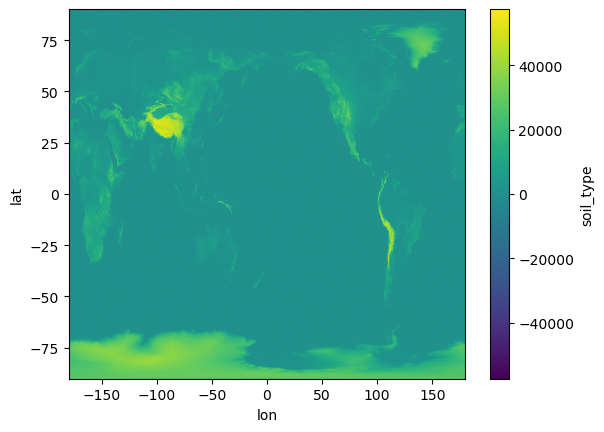

In [6]:
import numpy as np
import xarray as xr
# Load the uploaded file and process it
file_path = 'constant_masks/topography.npy'

# Load the data
soil_type = np.load(file_path)

# Convert to DataArray
soil_da = xr.DataArray(
    soil_type,
    dims=["lat", "lon"],
    coords={
        "lat": np.linspace(90, -90, soil_type.shape[0]),
        "lon": np.linspace(-180, 180, soil_type.shape[1]),
    },
    name="soil_type"
)

# Plot the data
soil_da.plot(cmap="viridis")

